In [1]:
#channel = ['em']

## Loading samples, store data in dataframe
import pandas as pd
%run data_prep_em.ipynb

('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


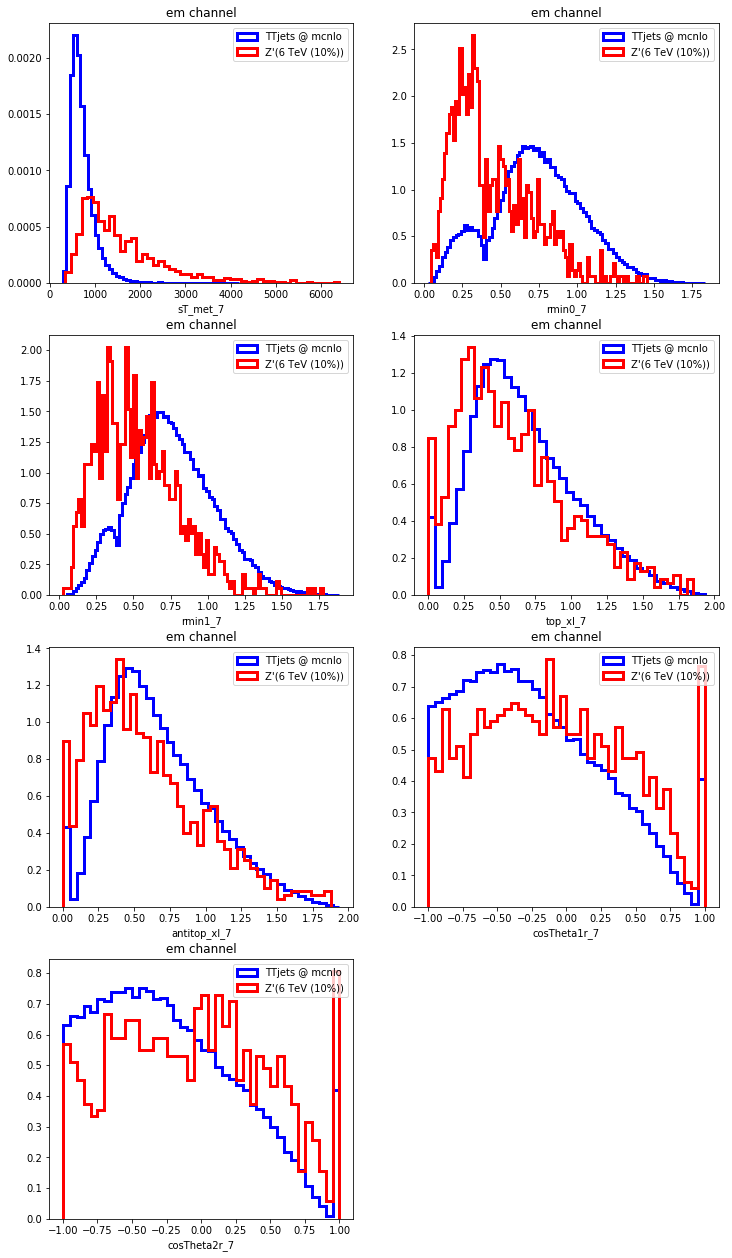

In [2]:
import math
seed = 1234
np.random.seed(seed)

df = {}
VARS = [ 'sT_met_7', 'rmin0_7', 'rmin1_7','top_xl_7','antitop_xl_7','cosTheta1r_7','cosTheta2r_7']
BINS = {'sT_met_7':50, 'rmin0_7':100, 'rmin1_7':100,'top_xl_7':40,'antitop_xl_7':40, 'cosTheta1r_7':40, 'cosTheta2r_7':40,}

for k in filename.keys():
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = df[k][df[k]['sT_met_7'] >=0]

df[('bkg','em')]['label'] = np.zeros(len(df[('bkg','em')]))
df[('sig','em')]['label'] = np.ones(len(df[('sig','em')]))


fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,22))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    sns.distplot(df[('bkg','em')][:][VARS[i]], norm_hist=True, kde=False,
             label="TTjets @ mcnlo", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue"})
    sns.distplot(df[('sig','em')][:][VARS[i]], norm_hist=True, kde=False,
             label="Z'(6 TeV (10%))", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red"})
    ax.legend(loc="upper right")
    ax.set(title='em channel')
plt.show()    



In [3]:
## DNN architecture 
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import regularizers
from IPython.display import Image

Using TensorFlow backend.


7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                112       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


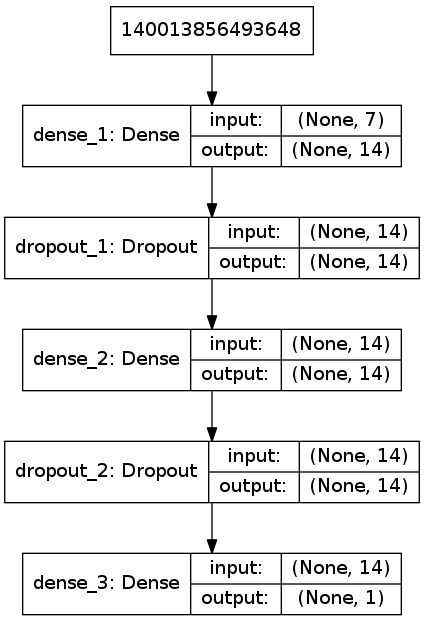

In [4]:
# Case 1: 2 layers, nodes = twice * features

NDIM = len(VARS)
print(NDIM)
model_2l_2f_l2reg = Sequential()

model_2l_2f_l2reg.add(Dense(NDIM*2, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_2l_2f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_2f_l2reg.add(Dense(NDIM*2, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_2l_2f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_2f_l2reg.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_2f_l2reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_2f_l2reg.summary()
plot_model(model_2l_2f_l2reg, to_file='model_2l_2f_l2reg.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_2f_l2reg.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28)                224       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 29        
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


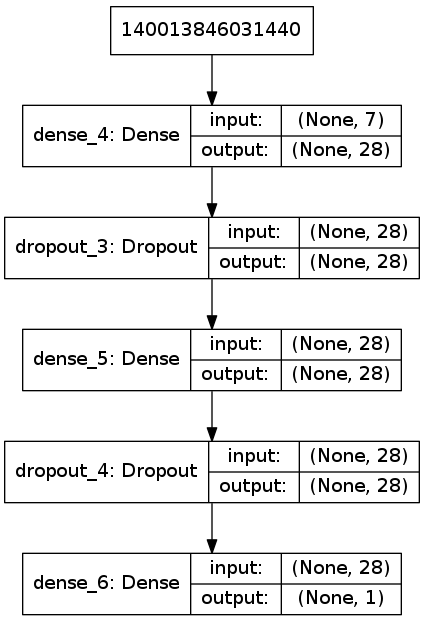

In [5]:
# Case 2: 2 layers, nodes = four* features  + l2 regularized

model_2l_4f_l2reg = Sequential()

model_2l_4f_l2reg.add(Dense(NDIM*4, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_2l_4f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_4f_l2reg.add(Dense(NDIM*4, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_2l_4f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_4f_l2reg.add(Dense(1, activation = "sigmoid"))

# compile the model
model_2l_4f_l2reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_4f_l2reg.summary()
plot_model(model_2l_4f_l2reg, to_file='model_2l_4f_l2reg.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_4f_l2reg.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 56)                448       
_________________________________________________________________
dropout_5 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 56)                3192      
_________________________________________________________________
dropout_6 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 28)                1596      
_________________________________________________________________
dropout_7 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 29        
Total para

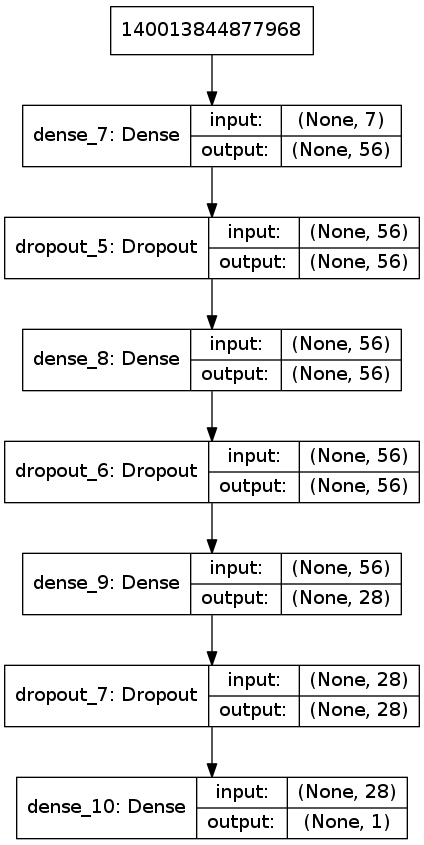

In [6]:
# Case 3: 2 layers
# layer 1: nodes = eight * features  
# layer 2: nodes = eight * features  
# layer 3: nodes = four * features  


model_3l_l2reg = Sequential()

model_3l_l2reg.add(Dense(NDIM*8, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_3l_l2reg.add(Dropout(0.2, noise_shape=None, seed=None))
model_3l_l2reg.add(Dense(NDIM*8, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_3l_l2reg.add(Dropout(0.2, noise_shape=None, seed=None))
model_3l_l2reg.add(Dense(NDIM*4, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_3l_l2reg.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_3l_l2reg.add(Dense(1, activation = "sigmoid"))


# compile the model
model_3l_l2reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3l_l2reg.summary()
plot_model(model_3l_l2reg, to_file='model_3l_l2reg.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_3l_l2reg.png')

In [7]:
#sample n events(n=number of signal events) from bkg 
from sklearn.model_selection import train_test_split

df_sampled_bkg = df[('bkg','em')].sample(n=df[('sig','em')].shape[0], random_state=1)
df_all = pd.DataFrame([])
df_all = pd.concat([df[('sig','em')],df_sampled_bkg])
print df[('sig','em')].shape
print df_sampled_bkg.shape
print df_all.shape

#shuffle events in entire dataframe
df_all.sample(frac=1)
np.random.seed(4)
np.random.shuffle(df_all.values)
df_all.head(15)

(1018, 8)
(1018, 8)
(2036, 8)


sT_met_7   rmin0_7   rmin1_7  top_xl_7  antitop_xl_7  cosTheta1r_7  \
0   5766.972633  0.204533  0.116882  0.850310      0.321354     -0.680903   
1    715.118649  0.752142  0.183114  0.770822      1.138608     -0.245267   
2   2476.161216  0.237904  0.499009  0.080387      0.000808      0.816015   
3   1266.844141  0.162869  0.187714  0.253791      1.833407      0.383511   
4   1153.093953  0.518329  0.614904  0.833746      0.768418     -0.186048   
5   1257.112196  0.350050  0.712876  0.679478      0.505612     -0.606946   
6    537.759219  0.897942  0.629742  0.604763      0.633766     -0.215114   
7   2512.651331  0.325411  0.391104  0.466256      0.194615      0.303677   
8   1294.019362  0.587652  0.501829  0.479848      0.492117      0.262001   
9   2164.030860  0.136222  0.594187  0.277729      0.179398     -0.660509   
10   975.512285  0.636400  0.682732  0.930614      0.308932     -0.853935   
11  2516.633873  0.317347  0.411368  0.301275      0.930071     -0.781277   
12   848.458480  1.217115  0.525250  1.194318      0.790589     -0.395911   
13  1306.589372  0.496146  0.502494  0.554384      0.310128     -0.012712   
14  1483.123576  0.725807  0.374736  1.662099      0.851155     -0.681681   

    cosTheta2r_7  label  
0       0.076083    1.0  
1      -0.255118    0.0  
2       0.998898    1.0  
3      -0.900619    0.0  
4       0.048260    1.0  
5      -0.015146    0.0  
6      -0.897876    0.0  
7      -0.428513    1.0  
8       0.248144    1.0  
9      -0.595281    1.0  
10      0.375435    0.0  
11     -0.355882    1.0  
12      0.175240    0.0  
13      0.657619    1.0  
14     -0.152657    1.0

In [8]:
X = df_all.iloc[:,0:len(VARS)] #Predictors
Y = df_all.iloc[:,len(VARS)]   #Outcomes


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print type(X_test)
print type(X)
print(X_train.shape)
print(X_test.shape)
print "fraction of train sample to entire data frame = ", X_train.shape[0]/float(X_train.shape[0]+X_test.shape[0])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1628, 7)
(408, 7)
fraction of train sample to entire data frame =  0.799607072692


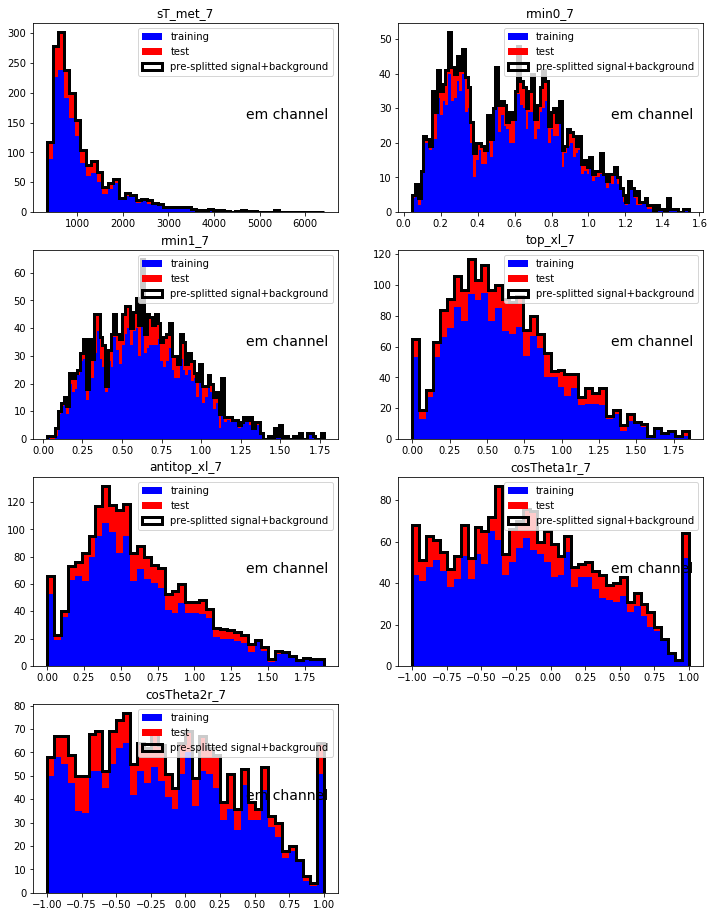

In [9]:

sample = {'training': 'blue', 'test': 'red'}

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,16))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
props = dict(boxstyle='round', facecolor='none', alpha=0.)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)    
    bins=np.histogram(np.hstack((X_test[VARS[i]],X_train[VARS[i]])), bins = BINS[VARS[i]])[1]
    
    plt.hist([X_train[VARS[i]], X_test[VARS[i]]], bins, stacked=True,
             color = [sample['training'], sample['test']], label=['training', 'test'])
    
    plt.hist(X[VARS[i]], bins, histtype='step',edgecolor='black', linewidth=3,
             facecolor='none',label='pre-splitted signal+background')
    
    ax.legend(loc="upper right")
    ax.text(0.7, 0.55, 'em channel', transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    plt.title(VARS[i])
    

plt.show() 

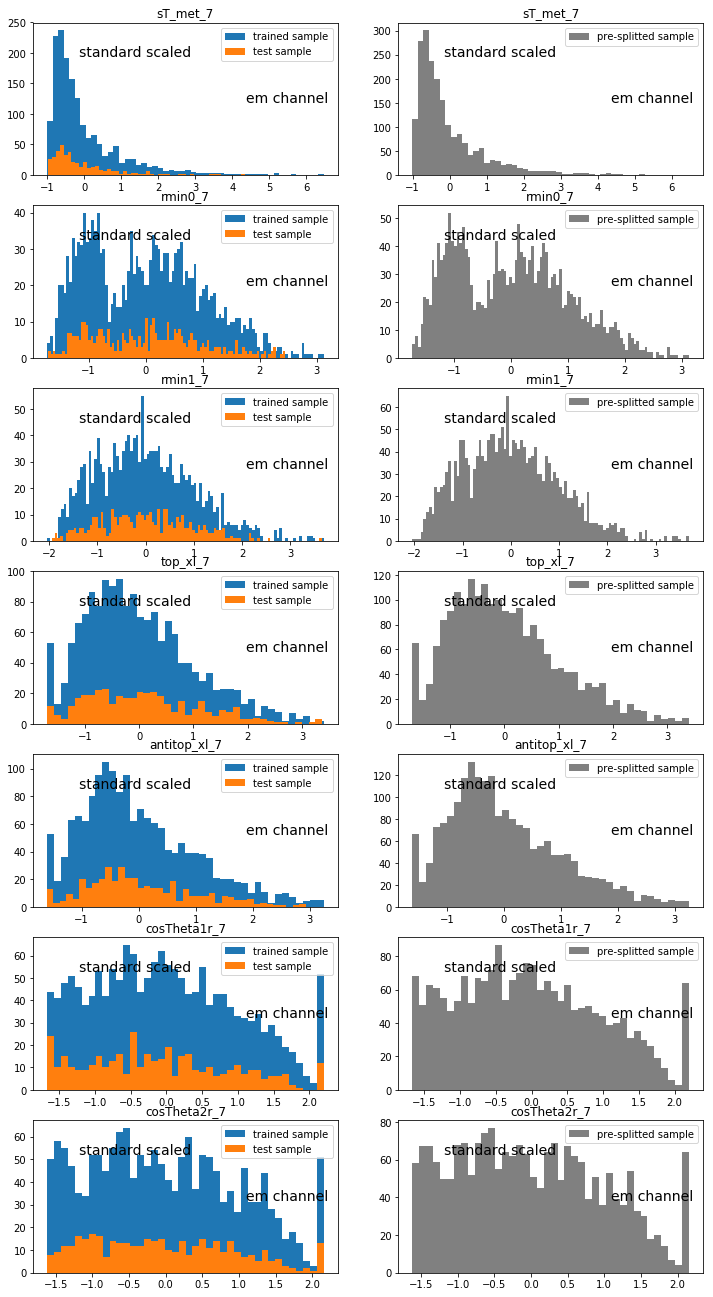

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load
from sklearn.externals import joblib

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

scaler_total = joblib.load(scaler_filename) 
X = scaler_total.transform(X)


fig, ax = plt.subplots(int(len(VARS)), 2, figsize=(12,23))


for i in range(len(VARS)):
    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+1)
    plt.hist(X_train[:,i], bins=BINS[VARS[i]], label='trained sample')
    plt.hist(X_test[:,i], bins=BINS[VARS[i]],label='test sample')
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
    ax.legend(loc="upper right")
    ax.text(0.7, 0.55, 'em channel', transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    

    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+2)
    plt.hist(X[:,i], bins=BINS[VARS[i]],color='grey',label='pre-splitted sample')
    ax.legend(loc="upper right")
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
    ax.text(0.7, 0.55, 'em channel', transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    
plt.show()  


In [11]:
# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)
# Train classifier
history_2l_2f_l2reg = model_2l_2f_l2reg.fit(X_train, 
                                            Y_train, 
                                            epochs=400, 
                                            batch_size=1024, 
                                            verbose=0, # switch to 1 for more verbosity 
                                            callbacks=[early_stopping, model_checkpoint], 
                                            validation_split=0.25)

# Train classifier
history_2l_4f_l2reg = model_2l_4f_l2reg.fit(X_train, 
                                            Y_train, 
                                            epochs=400, 
                                            batch_size=1024, 
                                            verbose=0, # switch to 1 for more verbosity 
                                            callbacks=[early_stopping, model_checkpoint], 
                                            validation_split=0.25)

# Train classifier
history_3l_l2reg = model_3l_l2reg.fit(X_train, 
                                      Y_train, 
                                      epochs=400, 
                                      batch_size=1024, 
                                      verbose=0, # switch to 1 for more verbosity 
                                      callbacks=[early_stopping, model_checkpoint], 
                                      validation_split=0.25)

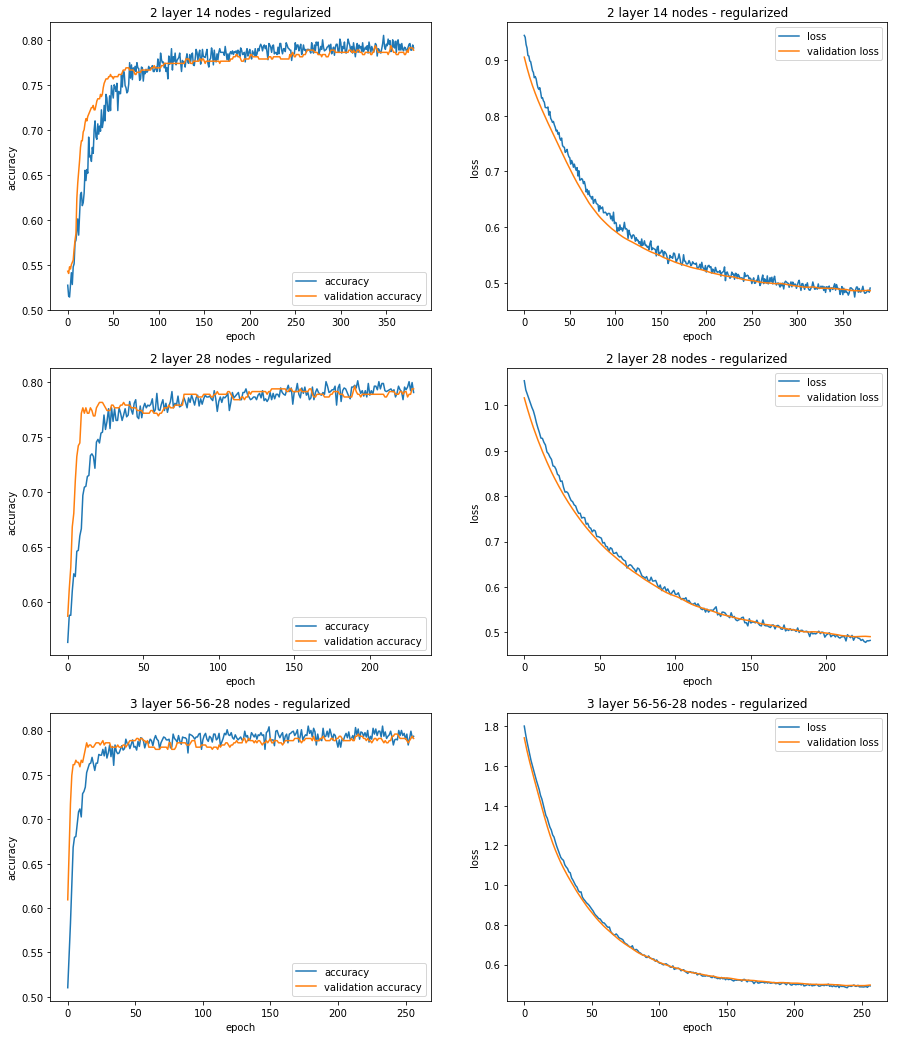

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15,18))

#MODEL 1
# plot accuracy vs epoch
ax = plt.subplot(3, 2, 1)
ax.plot(history_2l_2f_l2reg.history['acc'], label='accuracy')
ax.plot(history_2l_2f_l2reg.history['val_acc'], label='validation accuracy')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('2 layer 14 nodes - regularized'); 

# plot loss vs epoch
ax = plt.subplot(3, 2, 2)
ax.plot(history_2l_2f_l2reg.history['loss'], label='loss')
ax.plot(history_2l_2f_l2reg.history['val_loss'], label='validation loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 14 nodes - regularized');

#MODEL 2
# plot accuracy vs epoch
ax = plt.subplot(3, 2, 3)
ax.plot(history_2l_4f_l2reg.history['acc'], label='accuracy')
ax.plot(history_2l_4f_l2reg.history['val_acc'], label='validation accuracy')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('2 layer 28 nodes - regularized'); 

# plot loss vs epoch
ax = plt.subplot(3, 2, 4)
ax.plot(history_2l_4f_l2reg.history['loss'], label='loss')
ax.plot(history_2l_4f_l2reg.history['val_loss'], label='validation loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 28 nodes - regularized');

#MODEL 3
# plot accuracy vs epoch
ax = plt.subplot(3, 2, 5)
ax.plot(history_3l_l2reg.history['acc'], label='accuracy')
ax.plot(history_3l_l2reg.history['val_acc'], label='validation accuracy')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('3 layer 56-56-28 nodes - regularized'); 

# plot loss vs epoch
ax = plt.subplot(3, 2, 6)
ax.plot(history_3l_l2reg.history['loss'], label='loss')
ax.plot(history_3l_l2reg.history['val_loss'], label='validation loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('3 layer 56-56-28 nodes - regularized'); 


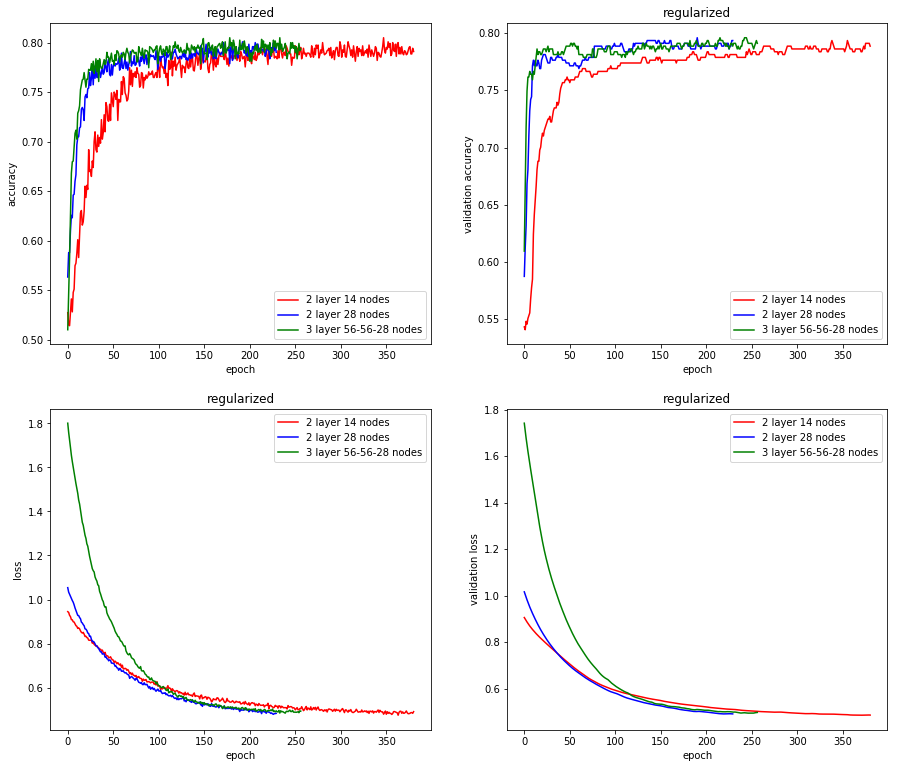

In [13]:
#COMPARING MODELS
plt.figure(figsize=(15,13))

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 1)
ax.plot(history_2l_2f_l2reg.history['acc'], color = 'red', label='2 layer 14 nodes')
ax.plot(history_2l_4f_l2reg.history['acc'], color = 'blue', label='2 layer 28 nodes')
ax.plot(history_3l_l2reg.history['acc'], color = 'green', label='3 layer 56-56-28 nodes')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title('regularized');


ax = plt.subplot(2, 2, 2)
ax.plot(history_2l_2f_l2reg.history['val_acc'], color = 'red', label='2 layer 14 nodes')
ax.plot(history_2l_4f_l2reg.history['val_acc'], color = 'blue', label='2 layer 28 nodes')
ax.plot(history_3l_l2reg.history['val_acc'], color = 'green', label='3 layer 56-56-28 nodes')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('validation accuracy')
ax.set_title('regularized');


# plot loss vs epoch
ax = plt.subplot(2, 2, 3)
ax.plot(history_2l_2f_l2reg.history['loss'], color = 'red', label='2 layer 14 nodes')
ax.plot(history_2l_4f_l2reg.history['loss'], color = 'blue', label='2 layer 28 nodes')
ax.plot(history_3l_l2reg.history['loss'], color = 'green', label='3 layer 56-56-28 nodes')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('regularized');

# plot loss vs epoch
ax = plt.subplot(2, 2, 4)
ax.plot(history_2l_2f_l2reg.history['val_loss'], color = 'red', label='2 layer 14 nodes')
ax.plot(history_2l_4f_l2reg.history['val_loss'], color = 'blue', label='2 layer 28 nodes')
ax.plot(history_3l_l2reg.history['val_loss'], color = 'green', label='3 layer 56-56-28 nodes')

ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('validation loss')
ax.set_title('regularized');


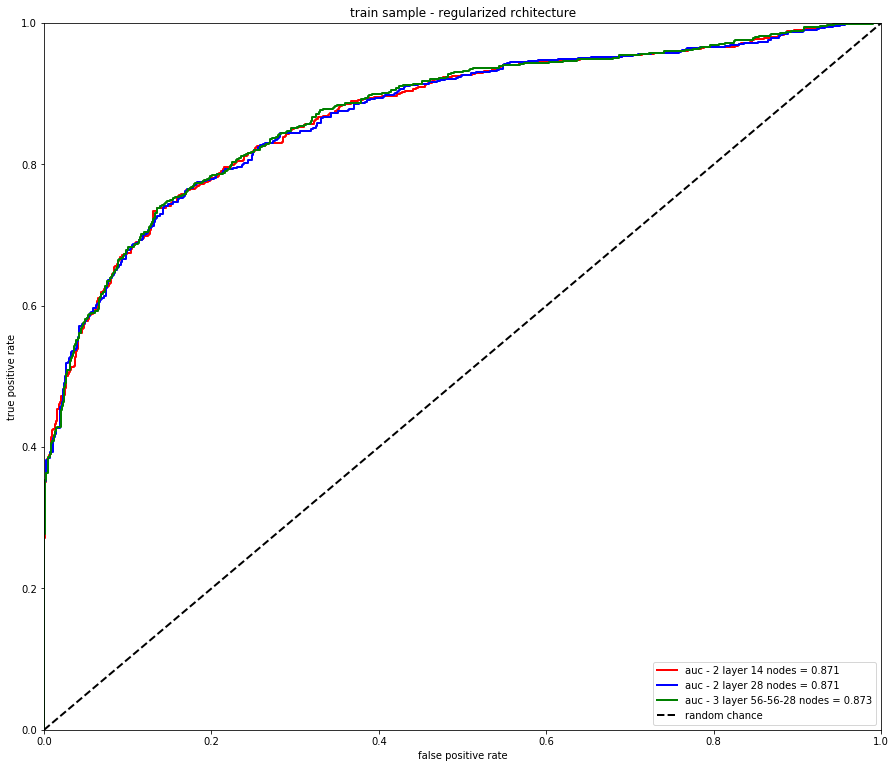

In [14]:
# Plot ROC for train sample

from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f_l2reg_train = model_2l_2f_l2reg.predict(X_train)
Y_predict_2l_4f_l2reg_train = model_2l_4f_l2reg.predict(X_train)
Y_predict_3l_l2reg_train = model_3l_l2reg.predict(X_train)


fpr_2l_2f_l2reg_train , tpr_2l_2f_l2reg_train , thresholds_2l_2f_l2reg_train  = roc_curve(Y_train, 
                                                                                          Y_predict_2l_2f_l2reg_train)
fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train , thresholds_2l_4f_l2reg_train  = roc_curve(Y_train, 
                                                                                          Y_predict_2l_4f_l2reg_train)
fpr_3l_l2reg_train , tpr_3l_l2reg_train , thresholds_3l_l2reg_train  = roc_curve(Y_train, 
                                                                                 Y_predict_3l_l2reg_train)
roc_auc_2l_2f_l2reg_train  = auc(fpr_2l_2f_l2reg_train , tpr_2l_2f_l2reg_train )
roc_auc_2l_4f_l2reg_train  = auc(fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train )
roc_auc_3l_l2reg_train     = auc(fpr_3l_l2reg_train , tpr_3l_l2reg_train )

plt.figure(figsize=(15,13))
ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f_l2reg_train , tpr_2l_2f_l2reg_train , lw=2, color='red', label='auc - 2 layer 14 nodes = %.3f' 
        % (roc_auc_2l_2f_l2reg_train ))
ax.plot(fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train , lw=2, color='blue', label='auc - 2 layer 28 nodes = %.3f' 
        % (roc_auc_2l_4f_l2reg_train ))
ax.plot(fpr_3l_l2reg_train , tpr_3l_l2reg_train , lw=2, color='green', label='auc - 3 layer 56-56-28 nodes = %.3f' 
        % (roc_auc_3l_l2reg_train ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for train sample')
ax.legend(loc="lower right")
ax.set_title('train sample - regularized rchitecture');



Text(0.5,0.98,'training sample')

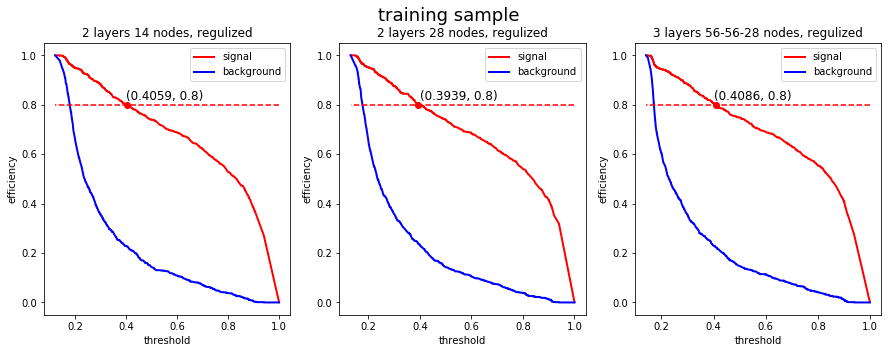

In [15]:
threshold = 0.8

# Plot efficiency vs threshold - training sample
plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)
ax.plot(thresholds_2l_2f_l2reg_train , tpr_2l_2f_l2reg_train , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_2f_l2reg_train , fpr_2l_2f_l2reg_train , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 14 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_2f_l2reg_train))])
ax.plot(thresholds_2l_2f_l2reg_train, horiz_line_data, 'r--',color='red') 
idx_2l_2f_train = np.argwhere(np.diff(np.sign(tpr_2l_2f_l2reg_train - horiz_line_data))).flatten()
ax.plot(thresholds_2l_2f_l2reg_train[idx_2l_2f_train], tpr_2l_2f_l2reg_train[idx_2l_2f_train], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_2f_l2reg_train[idx_2l_2f_train], 4), threshold), size=12)


ax = plt.subplot(1, 3, 2)
ax.plot(thresholds_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_4f_l2reg_train , fpr_2l_4f_l2reg_train , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_4f_l2reg_train))])
ax.plot(thresholds_2l_4f_l2reg_train, horiz_line_data, 'r--',color='red') 
idx_2l_4f_train = np.argwhere(np.diff(np.sign(tpr_2l_4f_l2reg_train - horiz_line_data))).flatten()
ax.plot(thresholds_2l_4f_l2reg_train[idx_2l_4f_train], tpr_2l_4f_l2reg_train[idx_2l_4f_train], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_4f_l2reg_train[idx_2l_4f_train], 4), threshold), size=12)



ax = plt.subplot(1, 3, 3)
ax.plot(thresholds_3l_l2reg_train , tpr_3l_l2reg_train , lw=2, color='red', label='signal')
ax.plot(thresholds_3l_l2reg_train , fpr_3l_l2reg_train , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('3 layers 56-56-28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_3l_l2reg_train))])
ax.plot(thresholds_3l_l2reg_train, horiz_line_data, 'r--',color='red') 
idx_3l_train = np.argwhere(np.diff(np.sign(tpr_3l_l2reg_train - horiz_line_data))).flatten()
ax.plot(thresholds_3l_l2reg_train[idx_3l_train], tpr_3l_l2reg_train[idx_3l_train], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_3l_l2reg_train[idx_3l_train][0], 4), threshold), size=12)

plt.suptitle('training sample', fontsize=18)


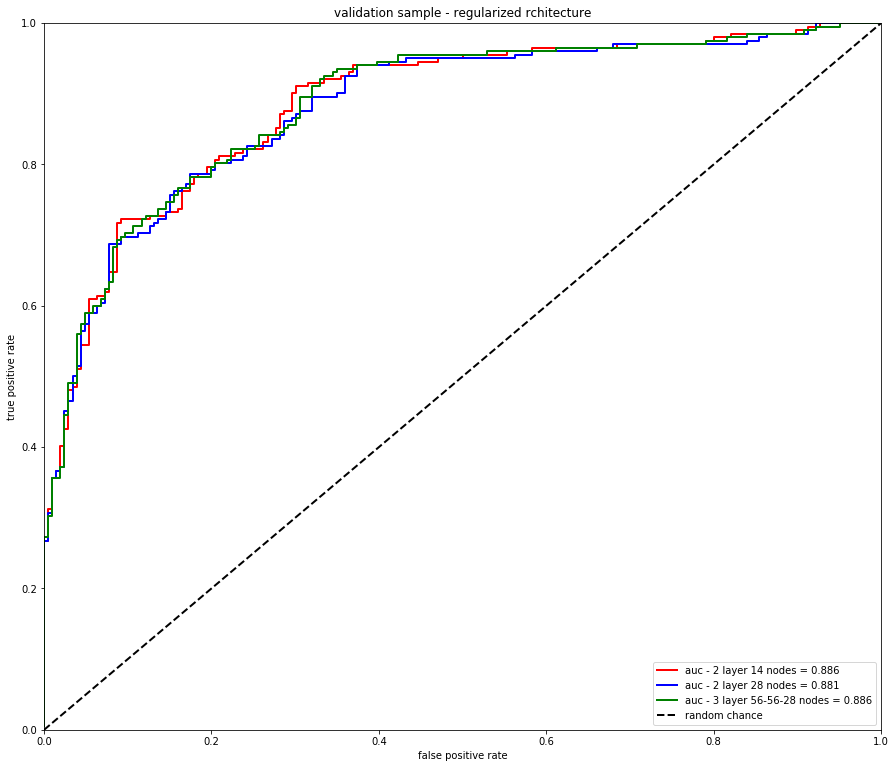

In [16]:
# Plot ROC for validation sample

from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f_l2reg_test = model_2l_2f_l2reg.predict(X_test)
Y_predict_2l_4f_l2reg_test = model_2l_4f_l2reg.predict(X_test)
Y_predict_3l_l2reg_test    = model_3l_l2reg.predict(X_test)


fpr_2l_2f_l2reg_test , tpr_2l_2f_l2reg_test , thresholds_2l_2f_l2reg_test  = roc_curve(Y_test, 
                                                                                       Y_predict_2l_2f_l2reg_test)
fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test , thresholds_2l_4f_l2reg_test  = roc_curve(Y_test, 
                                                                                       Y_predict_2l_4f_l2reg_test)
fpr_3l_l2reg_test , tpr_3l_l2reg_test , thresholds_3l_l2reg_test  = roc_curve(Y_test, 
                                                                              Y_predict_3l_l2reg_test)
roc_auc_2l_2f_l2reg_test  = auc(fpr_2l_2f_l2reg_test , tpr_2l_2f_l2reg_test )
roc_auc_2l_4f_l2reg_test  = auc(fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test )
roc_auc_3l_l2reg_test     = auc(fpr_3l_l2reg_test , tpr_3l_l2reg_test )

plt.figure(figsize=(15,13))
ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f_l2reg_test , tpr_2l_2f_l2reg_test , lw=2, color='red', label='auc - 2 layer 14 nodes = %.3f' 
        % (roc_auc_2l_2f_l2reg_test ))
ax.plot(fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test , lw=2, color='blue', label='auc - 2 layer 28 nodes = %.3f' 
        % (roc_auc_2l_4f_l2reg_test ))
ax.plot(fpr_3l_l2reg_test , tpr_3l_l2reg_test , lw=2, color='green', label='auc - 3 layer 56-56-28 nodes = %.3f' 
        % (roc_auc_3l_l2reg_test ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for test sample')
ax.legend(loc="lower right")
ax.set_title('validation sample - regularized rchitecture');



Text(0.5,0.98,'validation sample')

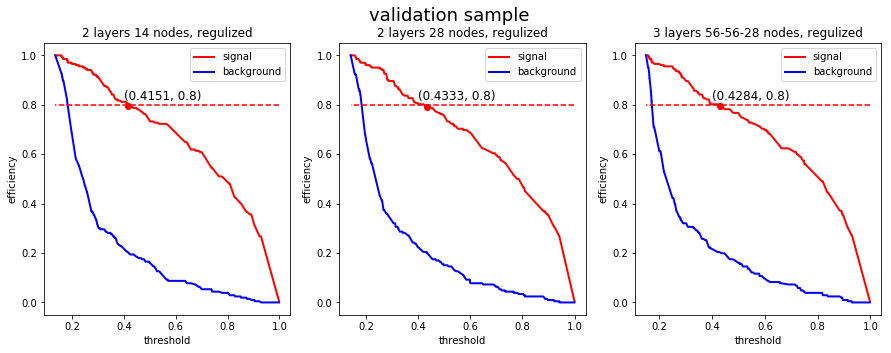

In [17]:
# Plot efficiency vs threshold - validation sample
plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)
ax.plot(thresholds_2l_2f_l2reg_test , tpr_2l_2f_l2reg_test , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_2f_l2reg_test , fpr_2l_2f_l2reg_test , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 14 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_2f_l2reg_test))])
ax.plot(thresholds_2l_2f_l2reg_test, horiz_line_data, 'r--',color='red') 
idx_2l_2f_test = np.argwhere(np.diff(np.sign(tpr_2l_2f_l2reg_test - horiz_line_data))).flatten()
ax.plot(thresholds_2l_2f_l2reg_test[idx_2l_2f_test], tpr_2l_2f_l2reg_test[idx_2l_2f_test], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_2f_l2reg_test[idx_2l_2f_test], 4), threshold), size=12)



ax = plt.subplot(1, 3, 2)
ax.plot(thresholds_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_4f_l2reg_test , fpr_2l_4f_l2reg_test , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_4f_l2reg_test))])
ax.plot(thresholds_2l_4f_l2reg_test, horiz_line_data, 'r--',color='red') 
idx_2l_4f_test = np.argwhere(np.diff(np.sign(tpr_2l_4f_l2reg_test - horiz_line_data))).flatten()
ax.plot(thresholds_2l_4f_l2reg_test[idx_2l_4f_test], tpr_2l_4f_l2reg_test[idx_2l_4f_test], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_4f_l2reg_test[idx_2l_4f_test], 4), threshold), size=12)



ax = plt.subplot(1, 3, 3)
ax.plot(thresholds_3l_l2reg_test , tpr_3l_l2reg_test , lw=2, color='red', label='signal')
ax.plot(thresholds_3l_l2reg_test , fpr_3l_l2reg_test , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('3 layers 56-56-28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_3l_l2reg_test))])
ax.plot(thresholds_3l_l2reg_test, horiz_line_data, 'r--',color='red') 
idx_3l_test = np.argwhere(np.diff(np.sign(tpr_3l_l2reg_test - horiz_line_data))).flatten()
ax.plot(thresholds_3l_l2reg_test[idx_3l_test], tpr_3l_l2reg_test[idx_3l_test], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_3l_l2reg_test[idx_3l_test], 4), threshold), size=12)

plt.suptitle('validation sample', fontsize=18)


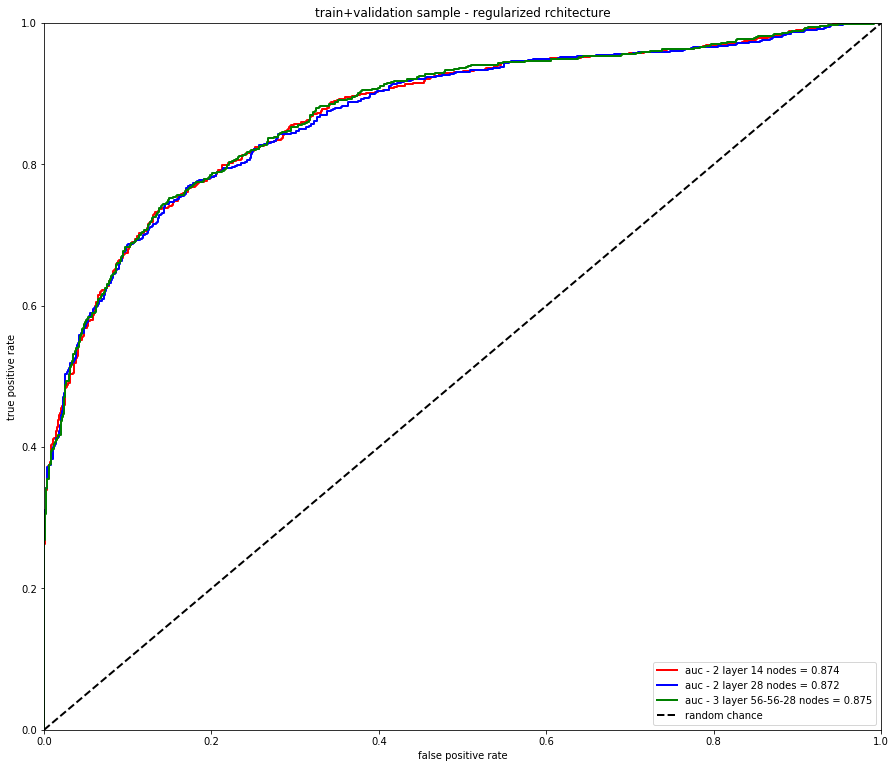

In [18]:
# Plot ROC for train+validation sample

from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f_l2reg = model_2l_2f_l2reg.predict(X)
Y_predict_2l_4f_l2reg = model_2l_4f_l2reg.predict(X)
Y_predict_3l_l2reg    = model_3l_l2reg.predict(X)


fpr_2l_2f_l2reg , tpr_2l_2f_l2reg , thresholds_2l_2f_l2reg  = roc_curve(Y, Y_predict_2l_2f_l2reg)
fpr_2l_4f_l2reg , tpr_2l_4f_l2reg , thresholds_2l_4f_l2reg  = roc_curve(Y, Y_predict_2l_4f_l2reg)
fpr_3l_l2reg , tpr_3l_l2reg , thresholds_3l_l2reg  = roc_curve(Y, Y_predict_3l_l2reg)
roc_auc_2l_2f_l2reg  = auc(fpr_2l_2f_l2reg , tpr_2l_2f_l2reg )
roc_auc_2l_4f_l2reg  = auc(fpr_2l_4f_l2reg , tpr_2l_4f_l2reg )
roc_auc_3l_l2reg     = auc(fpr_3l_l2reg , tpr_3l_l2reg )

plt.figure(figsize=(15,13))
ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f_l2reg , tpr_2l_2f_l2reg , lw=2, color='red', label='auc - 2 layer 14 nodes = %.3f' 
        % (roc_auc_2l_2f_l2reg ))
ax.plot(fpr_2l_4f_l2reg , tpr_2l_4f_l2reg , lw=2, color='blue', label='auc - 2 layer 28 nodes = %.3f' 
        % (roc_auc_2l_4f_l2reg ))
ax.plot(fpr_3l_l2reg , tpr_3l_l2reg , lw=2, color='green', label='auc - 3 layer 56-56-28 nodes = %.3f' 
        % (roc_auc_3l_l2reg ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for test sample')
ax.legend(loc="lower right")
ax.set_title('train+validation sample - regularized rchitecture');

Text(0.5,0.98,'training+validation sample')

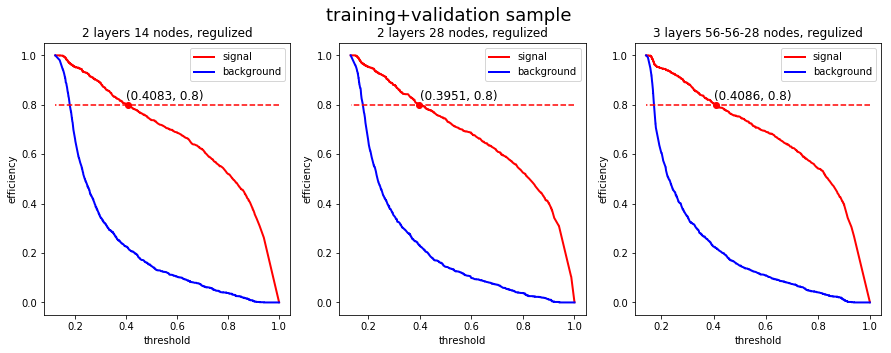

In [19]:
# Plot efficiency vs threshold - training+validation sample
plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)
ax.plot(thresholds_2l_2f_l2reg , tpr_2l_2f_l2reg , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_2f_l2reg , fpr_2l_2f_l2reg , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 14 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_2f_l2reg))])
ax.plot(thresholds_2l_2f_l2reg, horiz_line_data, 'r--',color='red') 
idx_2l_2f = np.argwhere(np.diff(np.sign(tpr_2l_2f_l2reg - horiz_line_data))).flatten()
ax.plot(thresholds_2l_2f_l2reg[idx_2l_2f], tpr_2l_2f_l2reg[idx_2l_2f], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_2f_l2reg[idx_2l_2f], 4), threshold), size=12)



ax = plt.subplot(1, 3, 2)
ax.plot(thresholds_2l_4f_l2reg , tpr_2l_4f_l2reg , lw=2, color='red', label='signal')
ax.plot(thresholds_2l_4f_l2reg , fpr_2l_4f_l2reg , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('2 layers 28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_2l_4f_l2reg))])
ax.plot(thresholds_2l_4f_l2reg, horiz_line_data, 'r--',color='red') 
idx_2l_4f = np.argwhere(np.diff(np.sign(tpr_2l_4f_l2reg - horiz_line_data))).flatten()
ax.plot(thresholds_2l_4f_l2reg[idx_2l_4f], tpr_2l_4f_l2reg[idx_2l_4f], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_2l_4f_l2reg[idx_2l_4f], 4), threshold), size=12)



ax = plt.subplot(1, 3, 3)
ax.plot(thresholds_3l_l2reg , tpr_3l_l2reg , lw=2, color='red', label='signal')
ax.plot(thresholds_3l_l2reg , fpr_3l_l2reg , lw=2, color='blue', label='background')
ax.set_xlabel('threshold')
ax.set_ylabel('efficiency')
ax.set_title('3 layers 56-56-28 nodes, regulized')
ax.legend(loc="upper right")

horiz_line_data = np.array([threshold for i in xrange(len(thresholds_3l_l2reg))])
ax.plot(thresholds_3l_l2reg, horiz_line_data, 'r--',color='red') 
idx_3l = np.argwhere(np.diff(np.sign(tpr_3l_l2reg - horiz_line_data))).flatten()
ax.plot(thresholds_3l_l2reg[idx_3l], tpr_3l_l2reg[idx_3l], 'ro')
ax.text(0.4, 0.82, '({}, {})'.format(round(thresholds_3l_l2reg[idx_3l], 4), threshold), size=12)

plt.suptitle('training+validation sample', fontsize=18)


Text(0.5,0.98,'training sample')

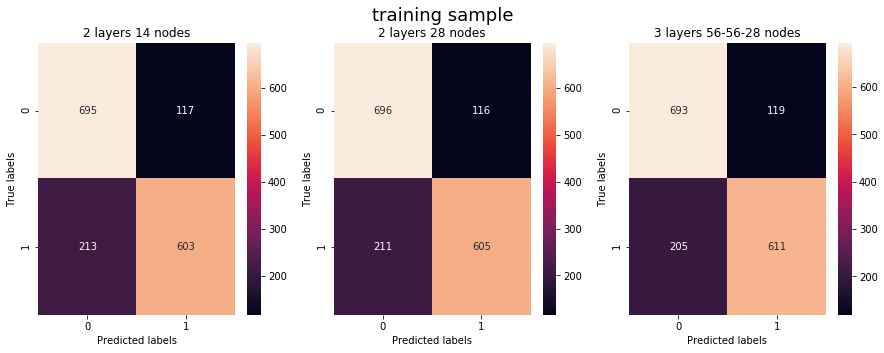

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.delaxes(ax[1,1])
    
matrix_2l_2f_l2reg_train = confusion_matrix(Y_train, Y_predict_2l_2f_l2reg_train.round())
matrix_2l_4f_l2reg_train = confusion_matrix(Y_train, Y_predict_2l_4f_l2reg_train.round())
matrix_3l_l2reg_train    = confusion_matrix(Y_train, Y_predict_3l_l2reg_train.round())



ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_2l_2f_l2reg_train, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 14 nodes'); 



ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2l_4f_l2reg_train, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 28 nodes'); 


ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3l_l2reg_train, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('3 layers 56-56-28 nodes'); 

plt.suptitle('training sample', fontsize=18)


Text(0.5,0.98,'validation sample')

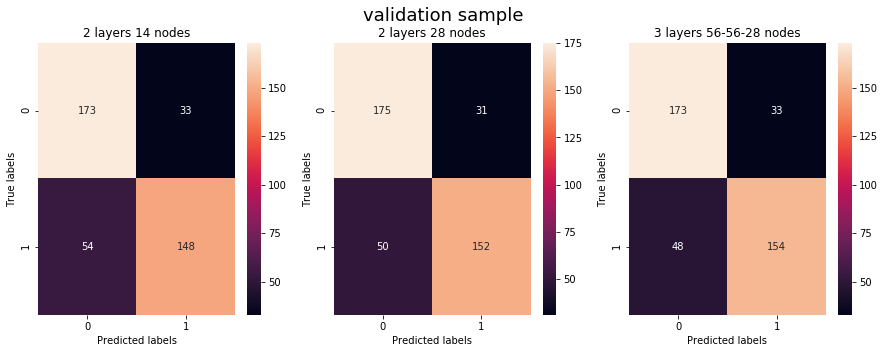

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.delaxes(ax[1,1])
    
matrix_2l_2f_l2reg_test = confusion_matrix(Y_test, Y_predict_2l_2f_l2reg_test.round())
matrix_2l_4f_l2reg_test = confusion_matrix(Y_test, Y_predict_2l_4f_l2reg_test.round())
matrix_3l_l2reg_test    = confusion_matrix(Y_test, Y_predict_3l_l2reg_test.round())



ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_2l_2f_l2reg_test, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 14 nodes'); 



ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2l_4f_l2reg_test, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 28 nodes'); 


ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3l_l2reg_test, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('3 layers 56-56-28 nodes'); 

plt.suptitle('validation sample', fontsize=18)


Text(0.5,0.98,'training+validation sample')

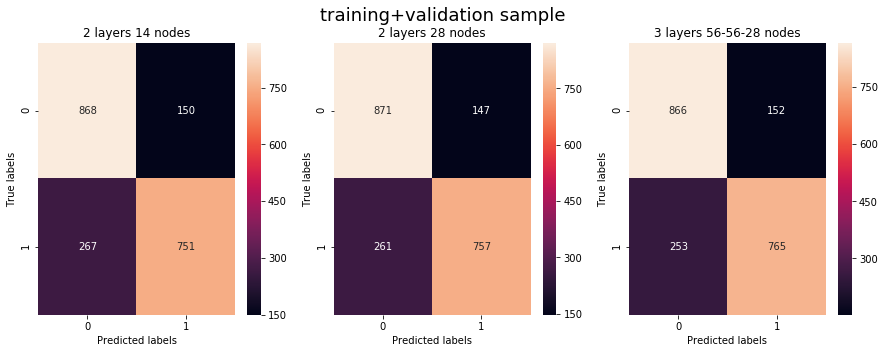

In [22]:
df_all['model_2l_2f_l2reg_predicted'] = model_2l_2f_l2reg.predict(X) # add prediction to array
df_all['model_2l_4f_l2reg_predicted'] = model_2l_4f_l2reg.predict(X) # add prediction to array
df_all['model_3l_l2reg_predicted']    = model_3l_l2reg.predict(X) # add prediction to array


matrix_2l_2f_l2reg = confusion_matrix(df_all['label'], df_all['model_2l_2f_l2reg_predicted'].round())
matrix_2l_4f_l2reg = confusion_matrix(df_all['label'], df_all['model_2l_4f_l2reg_predicted'].round())
matrix_3l_l2reg    = confusion_matrix(df_all['label'], df_all['model_3l_l2reg_predicted'].round())


fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.delaxes(ax[1,1])

ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_2l_2f_l2reg, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 14 nodes');

ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2l_4f_l2reg, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('2 layers 28 nodes');

ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3l_l2reg, annot=True, ax = ax, fmt='g'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('3 layers 56-56-28 nodes');

plt.suptitle('training+validation sample', fontsize=18)


In [23]:
from matplotlib import cm

df_all.iloc[:10]

sT_met_7   rmin0_7   rmin1_7  top_xl_7  antitop_xl_7  cosTheta1r_7  \
0  5766.972633  0.204533  0.116882  0.850310      0.321354     -0.680903   
1   715.118649  0.752142  0.183114  0.770822      1.138608     -0.245267   
2  2476.161216  0.237904  0.499009  0.080387      0.000808      0.816015   
3  1266.844141  0.162869  0.187714  0.253791      1.833407      0.383511   
4  1153.093953  0.518329  0.614904  0.833746      0.768418     -0.186048   
5  1257.112196  0.350050  0.712876  0.679478      0.505612     -0.606946   
6   537.759219  0.897942  0.629742  0.604763      0.633766     -0.215114   
7  2512.651331  0.325411  0.391104  0.466256      0.194615      0.303677   
8  1294.019362  0.587652  0.501829  0.479848      0.492117      0.262001   
9  2164.030860  0.136222  0.594187  0.277729      0.179398     -0.660509   

   cosTheta2r_7  label  model_2l_2f_l2reg_predicted  \
0      0.076083    1.0                     0.999296   
1     -0.255118    0.0                     0.471597   
2      0.998898    1.0                     0.984328   
3     -0.900619    0.0                     0.874854   
4      0.048260    1.0                     0.674175   
5     -0.015146    0.0                     0.740039   
6     -0.897876    0.0                     0.179711   
7     -0.428513    1.0                     0.972996   
8      0.248144    1.0                     0.814995   
9     -0.595281    1.0                     0.942853   

   model_2l_4f_l2reg_predicted  model_3l_l2reg_predicted  
0                     0.999857                  0.998992  
1                     0.470200                  0.482407  
2                     0.988784                  0.978326  
3                     0.911444                  0.890035  
4                     0.666328                  0.688940  
5                     0.710401                  0.742222  
6                     0.189132                  0.170957  
7                     0.981501                  0.969553  
8                     0.797756                  0.827867  
9                     0.952630                  0.945907

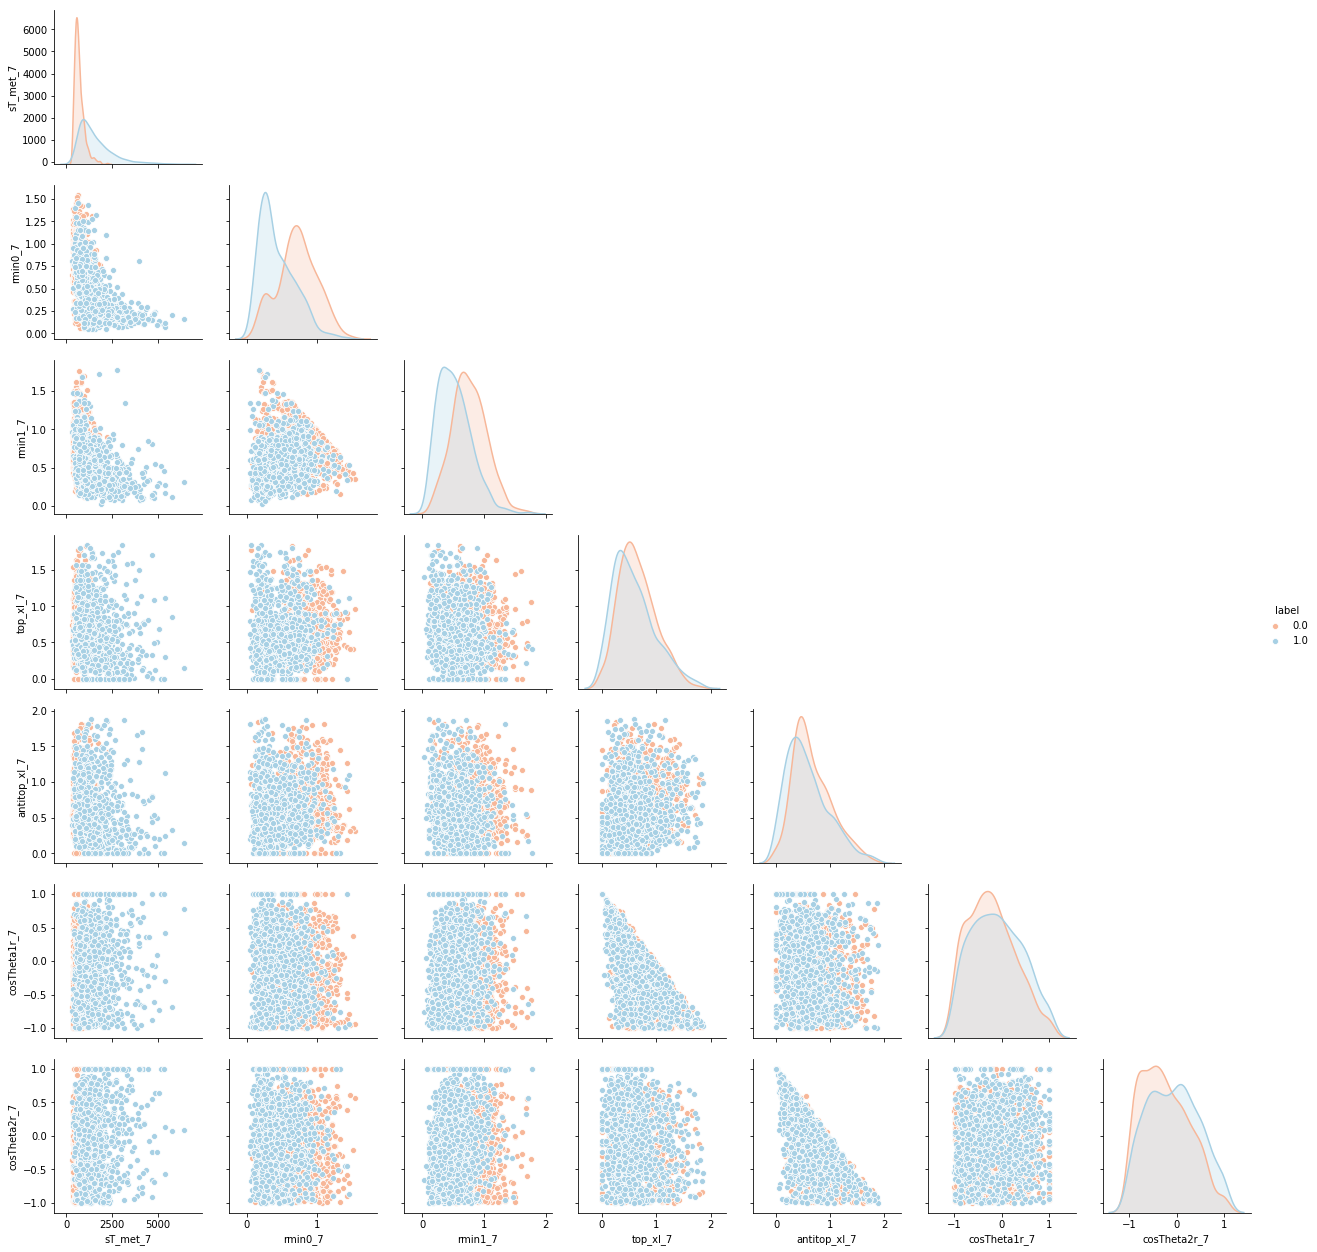

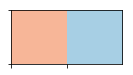

In [24]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

palette = sns.color_palette("RdBu",n_colors=2)
sns.set_palette(palette)
g = sns.pairplot(df_all, x_vars=VARS, y_vars=VARS, hue="label")
sns.palplot(palette)
g.map_upper(hide_current_axis)

/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'2 layers 14 nodes, regularized architecture')

<Figure size 1440x1440 with 0 Axes>

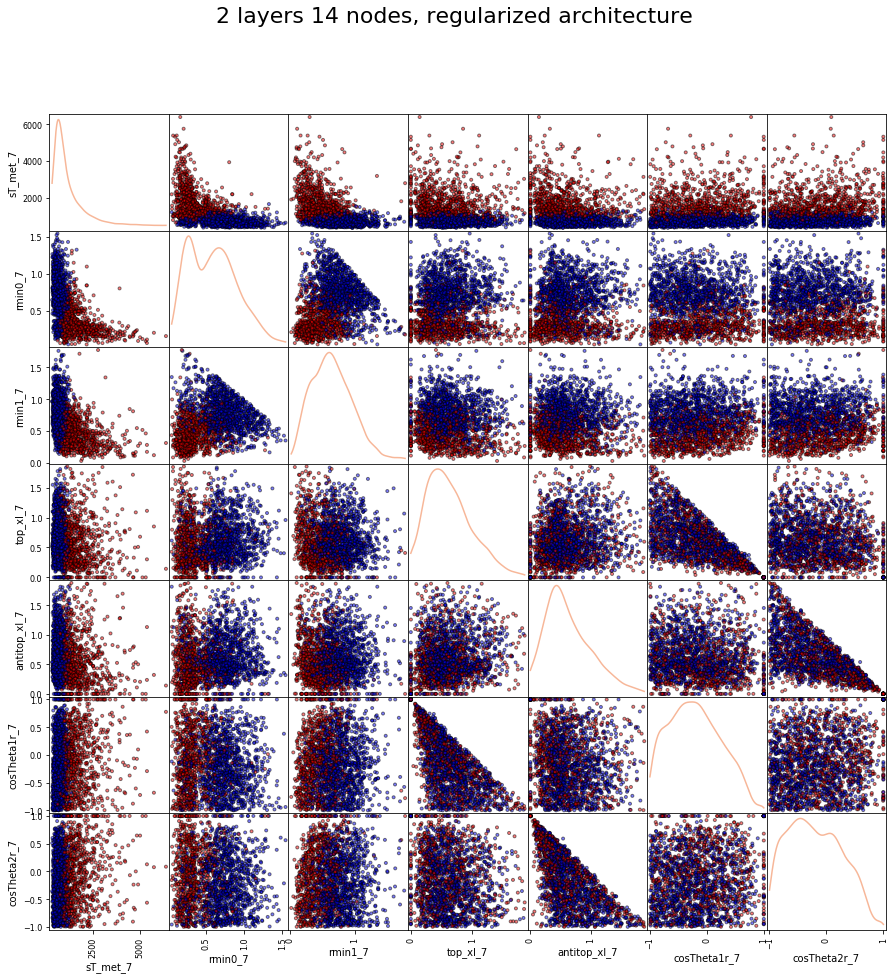

In [25]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_2l_2f_l2reg_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15],diagonal = 'kde')
plt.suptitle('2 layers 14 nodes, regularized architecture',fontsize=22)

/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'2 layers 28 nodes, regularized architecture')

<Figure size 1440x1440 with 0 Axes>

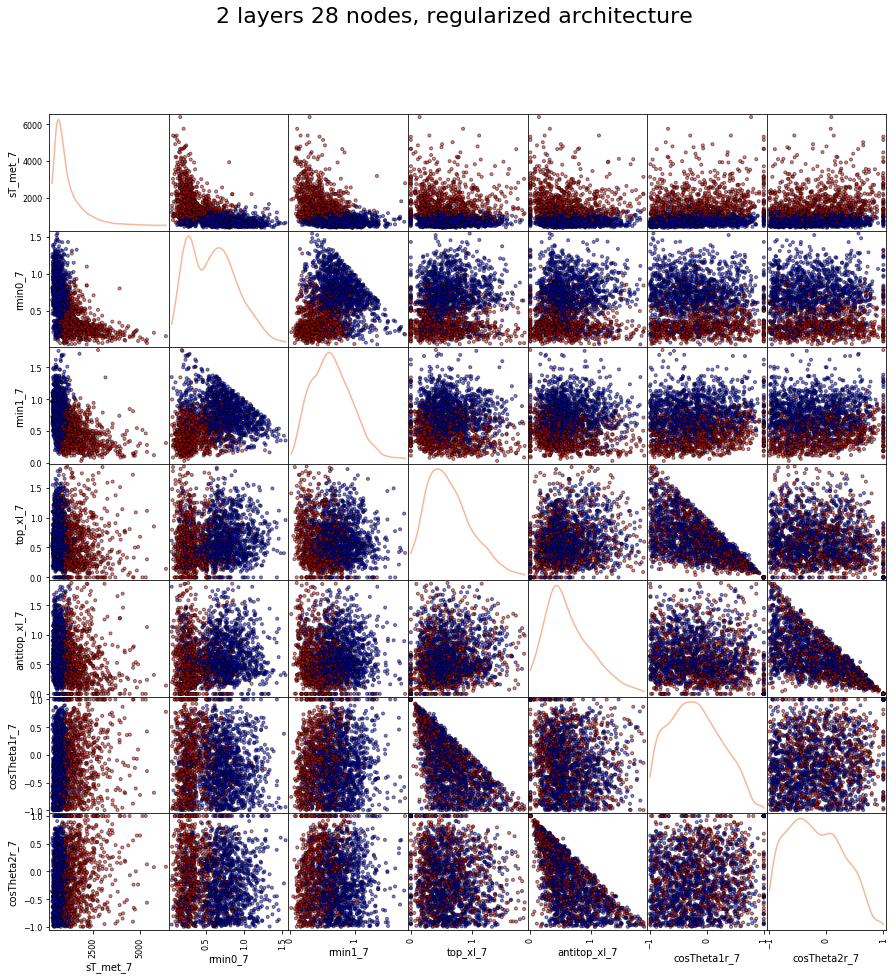

In [26]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_2l_4f_l2reg_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15],diagonal = 'kde')
plt.suptitle('2 layers 28 nodes, regularized architecture',fontsize=22)

/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'3 layers 56-56-28 nodes, regularized architecture')

<Figure size 1440x1440 with 0 Axes>

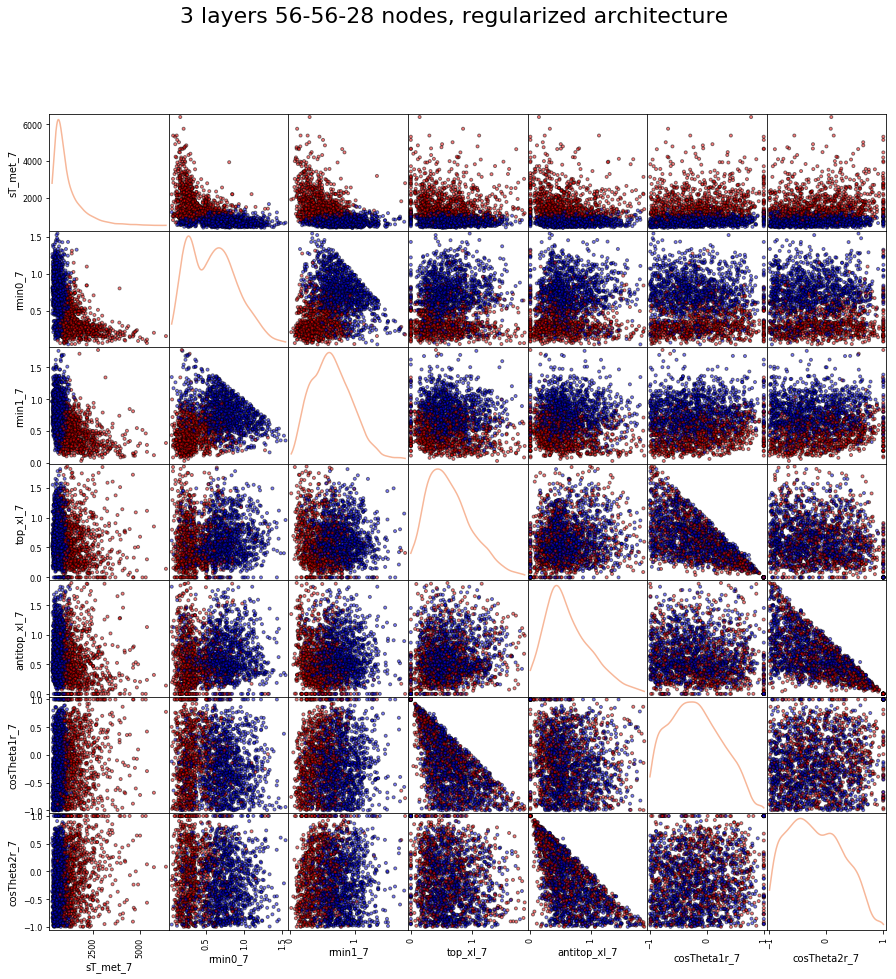

In [27]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_3l_l2reg_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15],diagonal = 'kde')
plt.suptitle('3 layers 56-56-28 nodes, regularized architecture',fontsize=22)

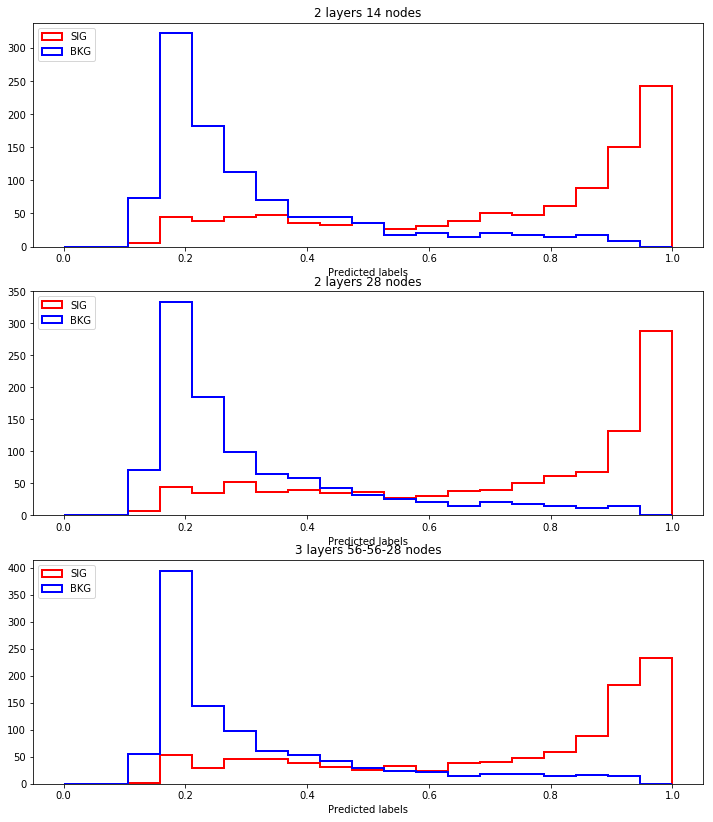

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(12,14))
ax = plt.subplot(3, 1, 1)
binBoundaries = np.linspace(0,1.0,20)
h1_sig = plt.hist(df_all[df_all['label'] == 1]["model_2l_2f_l2reg_predicted"], 
                  bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h1_bkg = plt.hist(df_all[df_all['label'] == 0]["model_2l_2f_l2reg_predicted"],
                  bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')
ax.legend(loc="upper left")
ax.set_xlabel('Predicted labels');
ax.title.set_text('2 layers 14 nodes')   

ax = plt.subplot(3, 1, 2)
h2_sig = plt.hist(df_all[df_all['label'] == 1]["model_2l_4f_l2reg_predicted"],
                  bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h2_bkg = plt.hist(df_all[df_all['label'] == 0]["model_2l_4f_l2reg_predicted"],
                  bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')
ax.legend(loc="upper left")
ax.set_xlabel('Predicted labels');
ax.title.set_text('2 layers 28 nodes')     


ax = plt.subplot(3, 1, 3)
h3_sig = plt.hist(df_all[df_all['label'] == 1]["model_3l_l2reg_predicted"],
                  bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h3_bkg = plt.hist(df_all[df_all['label'] == 0]["model_3l_l2reg_predicted"],
                  bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')
ax.legend(loc="upper left")
ax.title.set_text('3 layers 56-56-28 nodes') 
ax.set_xlabel('Predicted labels');
plt.show()



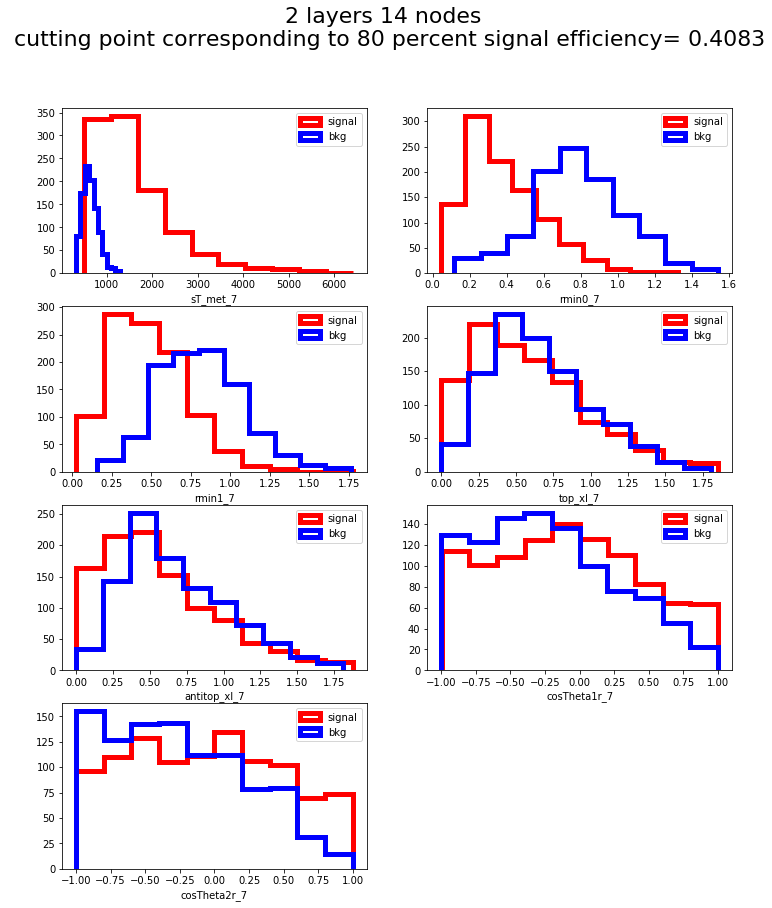

In [29]:
fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('2 layers 14 nodes \n cutting point corresponding to 80 percent signal efficiency= %.4f' % thresholds_2l_2f_l2reg[idx_2l_2f] ,fontsize=22)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_2l_2f_l2reg_predicted'] >= thresholds_2l_2f_l2reg[idx_2l_2f][0]][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_2l_2f_l2reg_predicted'] < thresholds_2l_2f_l2reg[idx_2l_2f][0]][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")

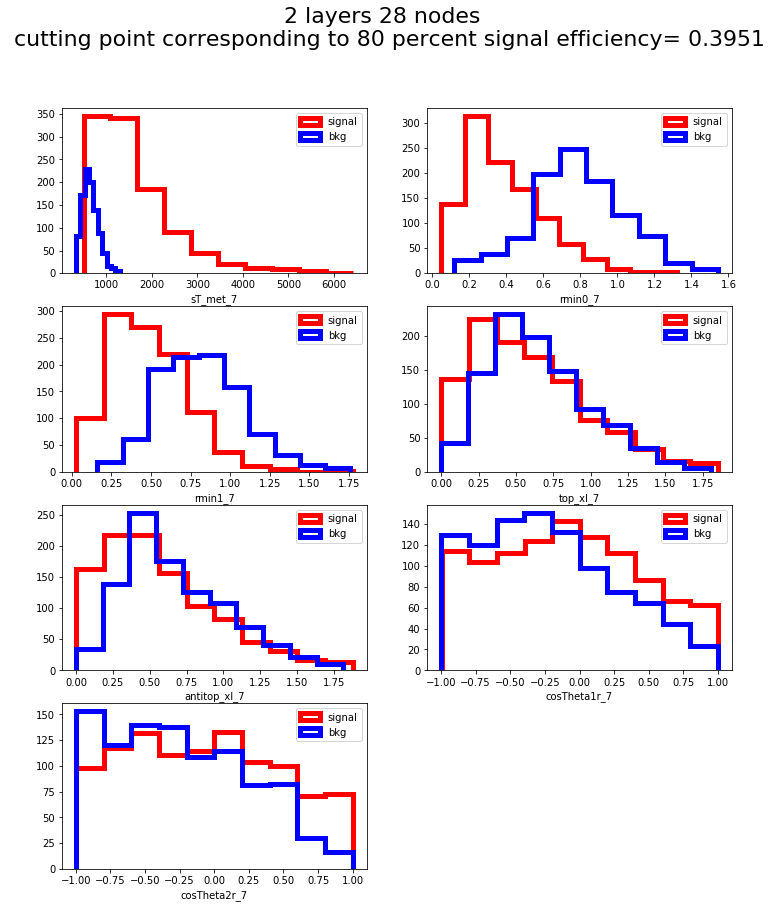

In [30]:
fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('2 layers 28 nodes \n cutting point corresponding to 80 percent signal efficiency= %.4f' % thresholds_2l_4f_l2reg[idx_2l_4f] ,fontsize=22)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_2l_4f_l2reg_predicted'] >= thresholds_2l_4f_l2reg[idx_2l_4f][0]][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_2l_4f_l2reg_predicted'] < thresholds_2l_4f_l2reg[idx_2l_4f][0]][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")

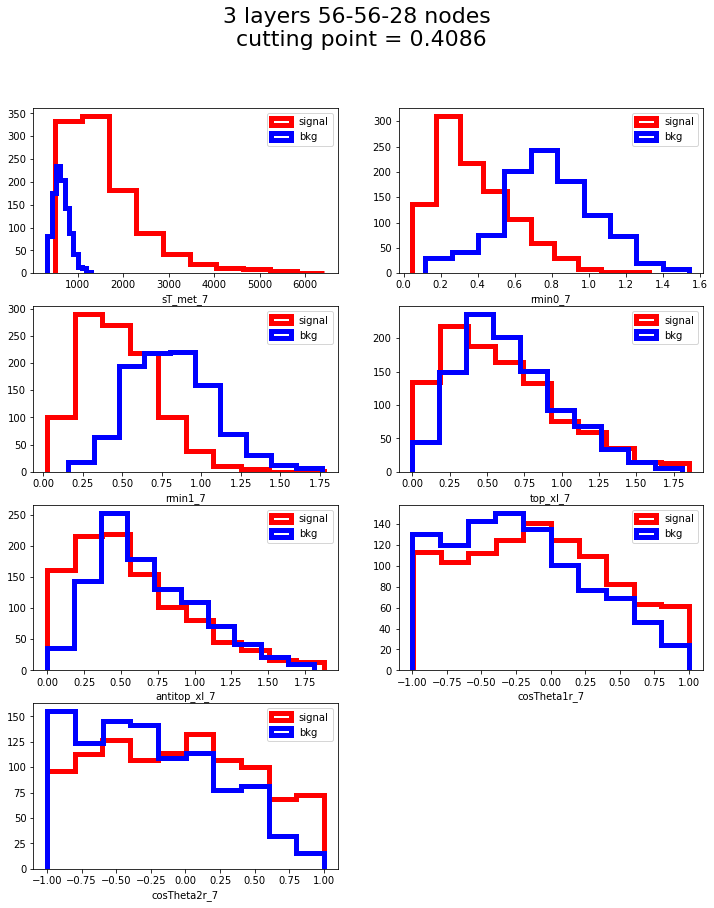

In [31]:
fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('3 layers 56-56-28 nodes\n cutting point = %.4f' % thresholds_3l_l2reg[idx_3l] ,fontsize=22)


for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_3l_l2reg_predicted'] >= thresholds_3l_l2reg[idx_3l][0]][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_3l_l2reg_predicted'] < thresholds_3l_l2reg[idx_3l][0]][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")